Installing packages and pulling data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/workspaces/gf_projects.github.io/WHO_LifeExpectancy/Life Expectancy Data.csv')
df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


First taking a look at the data 

In [3]:
#see initial column names
print(f"Column names (original): {df.columns}")

#removing trailing/leading spaces 
df.columns = df.columns.str.rstrip().str.lstrip()
print(f"Column names (fixed): {df.columns}")


Column names (original): Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Column names (fixed): Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [4]:
#pulling only select columns 
select_cols = df[['Country','Year','Status','Life expectancy','Measles','Schooling','HIV/AIDS','Alcohol']]

df = select_cols

In [5]:
#finding how many missing items per column
print(df.isnull().sum())


Country              0
Year                 0
Status               0
Life expectancy     10
Measles              0
Schooling          163
HIV/AIDS             0
Alcohol            194
dtype: int64


Lets also figure out how much data we would keep if we just got rid of all rows with NA values

In [6]:
df_noNAs = df[['Country','Year','Status','Life expectancy','Measles','Schooling','HIV/AIDS','Alcohol']].dropna()
df_noNAs

print(len(df_noNAs) / len(df) *100)

87.95098706603132


Ok now we need to decide what is the best course of action for dealing with the NA values. There is a good amount of them so we will start by looking at the overall distribution of the data across each group. 

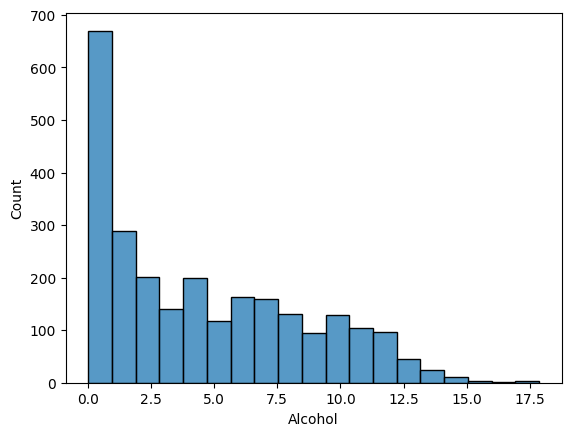

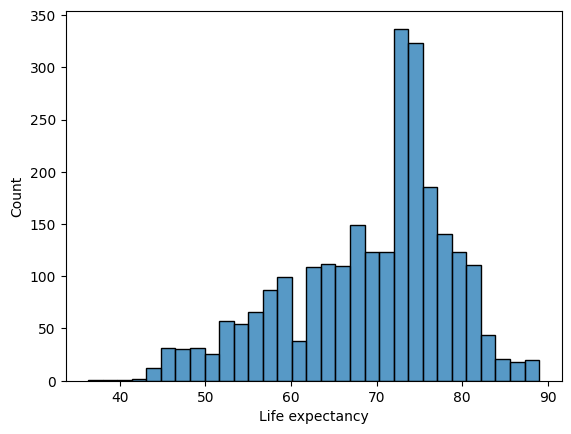

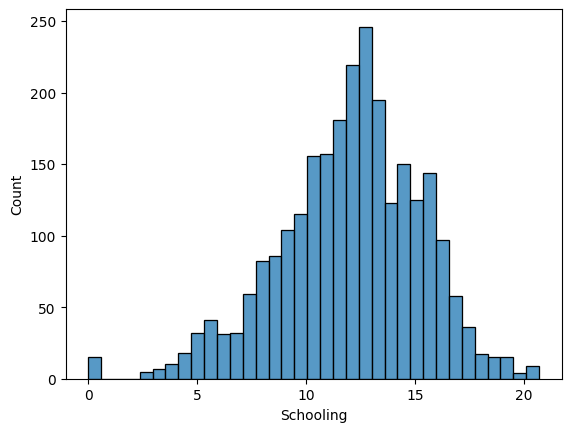

In [7]:
sns.histplot(df_noNAs['Alcohol'])
plt.show()

sns.histplot(df_noNAs['Life expectancy'])
plt.show()

sns.histplot(df_noNAs['Schooling'])
plt.show()


As we can see, the distributions among the various categories is pretty different. Only schooling shows a fairly normal distribution. The other categories show a distinct lean towards higher or lower values, which does make sense generally. Now we can take a look at the distribution based on country Status.

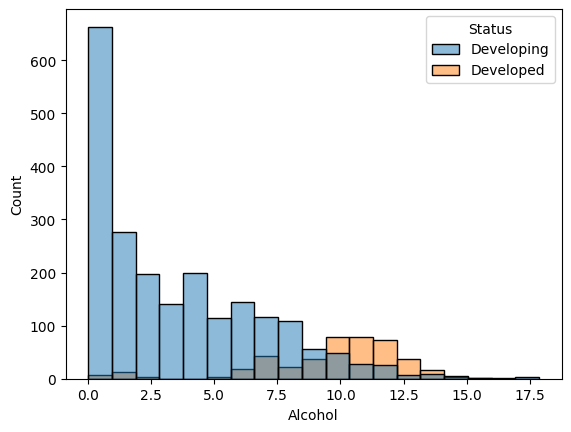

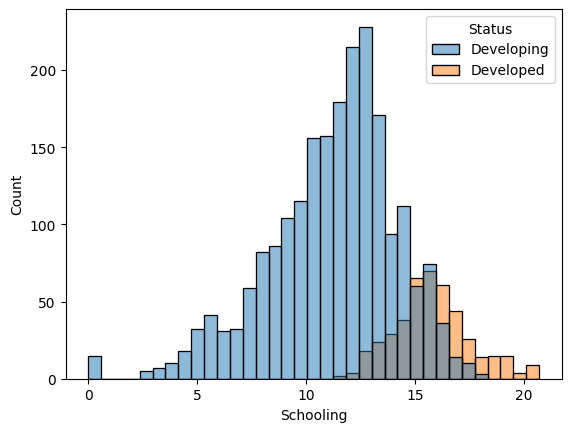

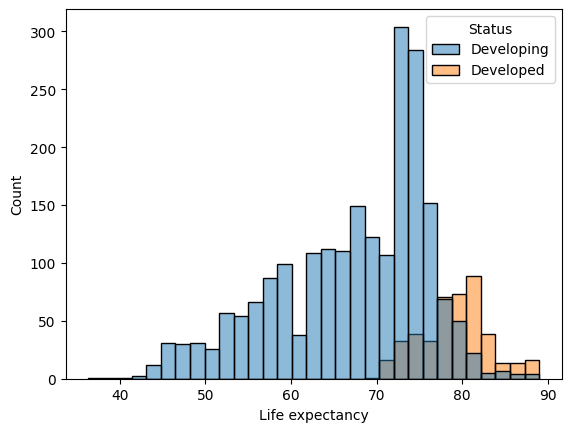

In [8]:
sns.histplot(data = df_noNAs, x = 'Alcohol', hue = 'Status')
plt.show()


sns.histplot(data = df_noNAs, x = 'Schooling', hue = 'Status')
plt.show()

sns.histplot(data = df_noNAs, x = 'Life expectancy', hue = 'Status')
plt.show()

It appears that there are differences in the distributions between country Status types, which leads me to believe if we do mean imputation, it will need to be grouped by country status. But before we do that, we need to make sure these distributions are actually significantly different, basiscally checking to make sure what we see is real. 

In [9]:
print(df['Status'].unique())

['Developing' 'Developed']


In [10]:
#t test performed for schooling 
#https://stackoverflow.com/questions/13404468/t-test-in-pandas 

developing = df[df['Status'] == 'Developing']
developed= df[df['Status'] == 'Developed']

t_statistic, p_value = stats.ttest_ind(developing['Schooling'], developed['Schooling'], equal_var=True, nan_policy= 'omit')

print('Schooling')     
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between group means.")
else:
        print("Fail to reject the null hypothesis: No significant difference found.")


t_statistic, p_value = stats.ttest_ind(developing['Life expectancy'], developed['Life expectancy'], equal_var=True, nan_policy= 'omit')

print('Life expectancy')     
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between group means.")
else:
        print("Fail to reject the null hypothesis: No significant difference found.")

t_statistic, p_value = stats.ttest_ind(developing['Alcohol'], developed['Alcohol'], equal_var=True, nan_policy= 'omit')

print('Alcohol')     
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference between group means.")
else:
        print("Fail to reject the null hypothesis: No significant difference found.")

Schooling
T-statistic: -31.557902068007547
P-value: 4.980038772014561e-187
Reject the null hypothesis: There is a significant difference between group means.
Life expectancy
T-statistic: -29.76836505889292
P-value: 2.4650861700062064e-170
Reject the null hypothesis: There is a significant difference between group means.
Alcohol
T-statistic: -38.93305083547672
P-value: 2.43666121862958e-264
Reject the null hypothesis: There is a significant difference between group means.


We can see that there are significant differences between the means of the developed and developing countries. This tells us that we will need to mean impute based on group so as not to skew the data too much.

Going to perform mean imputation by country status bc of the missing values for Schooling and Life expectancy. Schooling has a normal distributionm, but different for Developed vs Developing. While life expectancy is does not have a normal distribution, there are only 10 missing values, so it will not majory impact the mean. 

In [11]:
#first creating groups based on country 
group_df = df.groupby('Status')

groupStatus_names = list(group_df.groups.keys())
print(f'group names {groupStatus_names}')


group names ['Developed', 'Developing']


Now I'm going to mean impute for Life expectancy and schooling based on the country status

In [12]:
#mean impute for alcohol 
#df['Alcohol'] = df.groupby('Status')['Alcohol'].transform(lambda x: x.fillna(x.mean()))

#life expectancy  
df['Life expectancy'] = df.groupby('Status')['Life expectancy'].transform(lambda x: x.fillna(x.mean()))

#schooling
df['Schooling'] = df.groupby('Status')['Schooling'].transform(lambda x: x.fillna(x.mean()))

#checking all to see if there are still any nas left 
print(df.isnull().sum())


Country              0
Year                 0
Status               0
Life expectancy      0
Measles              0
Schooling            0
HIV/AIDS             0
Alcohol            194
dtype: int64


/tmp/ipykernel_19515/2256589345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Life expectancy'] = df.groupby('Status')['Life expectancy'].transform(lambda x: x.fillna(x.mean()))
/tmp/ipykernel_19515/2256589345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Schooling'] = df.groupby('Status')['Schooling'].transform(lambda x: x.fillna(x.mean()))


In [77]:
#lets see whether certain countries are just missing a lot of data 
na_count_groups = df.groupby('Status').apply(lambda x: x.isna().sum())

#sum across rows
total_na_groups = na_count_groups.sum(axis = 1)

#seeing countries with the most NAs remaining 
print(total_na_groups.nlargest(20))


Status
Developing    166
Developed      28
dtype: int64


/tmp/ipykernel_2052/4134595969.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_count_groups = df.groupby('Status').apply(lambda x: x.isna().sum())


Now that we've established there are remaining NA values, we're going to check whether it is possible to just get rid of the NA values rather than doing another round of mean imputation. 

In [78]:
df_noNAs = df[['Country','Year','Status','Life expectancy','Measles','Schooling','HIV/AIDS','Alcohol']].dropna()
df_noNAs

print(len(df_noNAs) / len(df) *100)

93.39686861810755


Looks like we'd still have 93% of the data after dropping the NAs from the Alcohol column 